In [1]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

## NEQR Circuit with On and Off Pixels

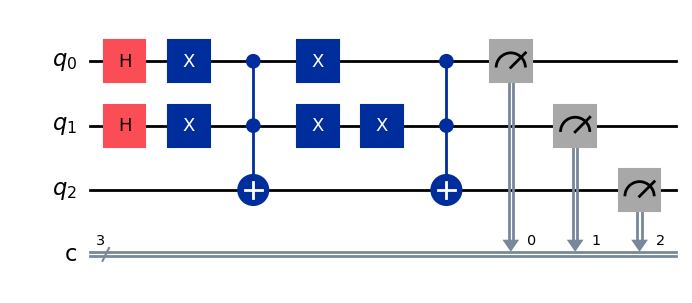

<Figure size 1200x600 with 0 Axes>

In [2]:
# 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Circuit operations
qc.h(0)
qc.h(1)
qc.x(0)
qc.x(1)
qc.ccx(0, 1, 2) 
qc.x(1)
qc.x(0)
qc.x(1)
qc.ccx(0, 1, 2)
qc.measure([0,1,2], [0,1,2])

plt.figure(figsize=(12,6))
qc.draw('mpl')

## NEQR Circuit with pixels holding 4 values

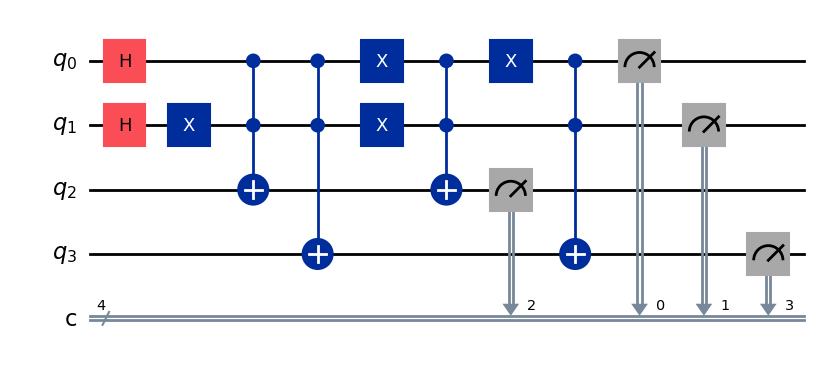

<Figure size 1200x600 with 0 Axes>

In [3]:
# 4 qubits and 4 classical bits
qc = QuantumCircuit(4, 4)

# Circuit operations
qc.h(0)
qc.h(1)
qc.x(1)
qc.ccx(0, 1, 2)
qc.ccx(0, 1, 3)
qc.x(1)
qc.x(0)
qc.ccx(0, 1, 2)
qc.x(0)
qc.ccx(0, 1, 3)
qc.measure([0,1,2,3], [0,1,2,3])

# Draw circuit
plt.figure(figsize=(12,6))
qc.draw('mpl')


Counts: {'0000': 1017, '0110': 1021, '1011': 1016, '1101': 1042}


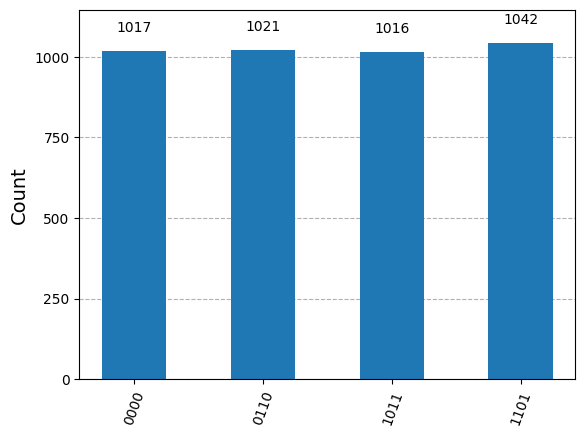

In [4]:
simulator = AerSimulator()
job = simulator.run(qc, shots=4096)
result = job.result()
counts = result.get_counts(qc)
print('\nCounts:', counts)

plot_histogram(counts)

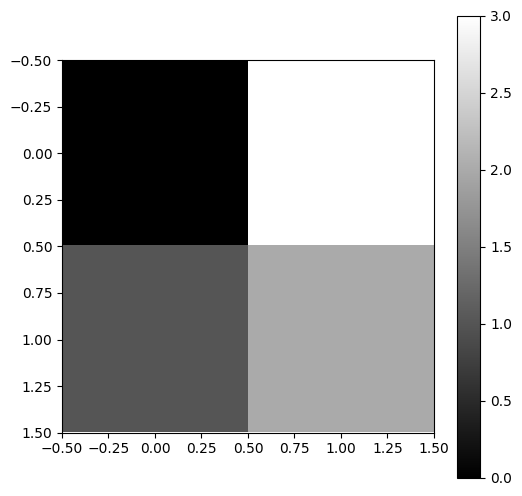


Reconstructed image array:
[[0 3]
 [1 2]]


In [5]:
image = [[0, 0], [0, 0]]
values = [[0, 0], [0, 0]]

for x in counts:
   if x[-2:] == '00':
       if counts[x] > values[0][0]:
           values[0][0] = counts[x]
           image[0][0] = int(x[0:-2], 2)
   elif x[-2:] == '01':
       if counts[x] > values[0][1]:
           values[0][1] = counts[x]
           image[0][1] = int(x[0:-2], 2)
   elif x[-2:] == '10':
       if counts[x] > values[1][0]:
           values[1][0] = counts[x]
           image[1][0] = int(x[0:-2], 2)
   elif x[-2:] == '11':
       if counts[x] > values[1][1]:
           values[1][1] = counts[x]
           image[1][1] = int(x[0:-2], 2)

plt.figure(figsize=(6,6))
plt.imshow(image, cmap="gray")
plt.colorbar()
plt.show()

print("\nReconstructed image array:")
print(np.array(image))